In [1]:
## 時間評価用
class ClMesureTime:
    def __init__(self, fnObjAg):
        self.m_fnObj = fnObjAg
    
    def __call__(self, *objAg):
        import time
        dbStartTimeAt = time.clock()
        ret = self.m_fnObj(*objAg)
        print("time:", time.clock() - dbStartTimeAt)
        return ret
        
def dcrtF(fnAg):
    return ClMesureTime(fnAg)

## 準ニュートン法

以下のサンプルコードは https://myenigma.hatenablog.com/entry/2016/05/03/212106 にあった. 

サンプルコードを貼ってみる. 意外と書いてみると, 最適化法(田村, 村松) にある通りなんだなぁと思った. このレベルだったらCppとかで実装も簡単にできるのでは. 

QuasiNewtonMethod
OK:  8310
time: 1.3258089999999996


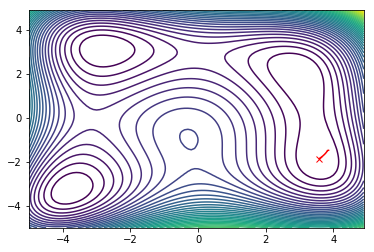

In [3]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

## 準ニュートン法
import matplotlib.pyplot as plt
import numpy as np
import random
import math

delta = 0.1
minXY=-5.0
maxXY=5.0
nContour=50
alpha=0.001

def Jacob(state):
    u"""
    jacobi matrix of Himmelblau's function
    """
    x=state[0,0]
    y=state[0,1]
    dx=4*x**3+4*x*y-44*x+2*x+2*y**2-14
    dy=2*x**2+4*x*y+4*y**3-26*y-22
    J=np.matrix([dx,dy]).T
    return J

def HimmelblauFunction(x,y):
    u"""
    Himmelblau's function
    see Himmelblau's function - Wikipedia, the free encyclopedia 
    http://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    return (x**2+y-11)**2+(x+y**2-7)**2

def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[HimmelblauFunction(x,y) for (x,y) in zip(X,Y)]
    return(X,Y,Z)

@dcrtF
def QuasiNewtonMethod(start,Jacob):
    u"""
    Quasi Newton Method Optimization
    """
    print ("QuasiNewtonMethod")
    result=start
    x=start

    H= np.identity(2)
    preJ=None
    preG=None
    count = 0
    while 1:
        J=Jacob(x)
        
        sumJ=abs(np.sum(J))
        if sumJ<=0.01:
            print("OK: ", count)
            break

        grad=-np.linalg.inv(H)*J
        # print(grad)
        x+=alpha*grad.T
        
        result=np.vstack((result,np.array(x)))

        if preJ is not None:
            y=J-preJ
            H=H+(y*y.T)/(y.T*preG)-(H*preG*preG.T*H)/(preG.T*H*preG)

        count += 1
        preJ=J
        preG=(alpha*grad.T).T


    return result

# Main
start=np.matrix([random.uniform(minXY,maxXY),random.uniform(minXY,maxXY)])

result=QuasiNewtonMethod(start,Jacob)
(X,Y,Z)=CreateMeshData()
CS = plt.contour(X, Y, Z,nContour)

plt.plot(start[0,0],start[0,1],"xr")

optX=result[:,0]
optY=result[:,1]
plt.plot(optX,optY,"-r")

plt.show()

## ニュートン法

Python実装が https://myenigma.hatenablog.com/entry/20150110/1420964178 にあった. 

サンプルコードを貼ってみる. こちらも, 最適化法(田村, 村松) にある通りなんだなぁと思った. このレベルだったらCppとかで実装も簡単にできるのでは. 

NewtonMethod
OK:  162
[-2.80511821  3.13131251]
time: 0.01273900000000161


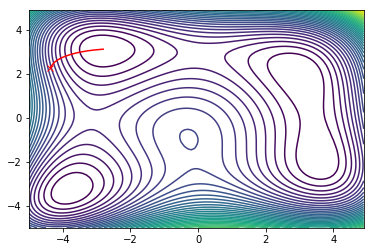

In [10]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

## ニュートン法
import matplotlib.pyplot as plt
import numpy as np
import random

delta = 0.1
minXY=-5.0
maxXY=5.0
nContour=50
alpha=0.1

def Hessian(state):
    u"""
    Hessian matrix of Himmelblau's function
    """
    x=state[0]
    y=state[1]
    dxx=12*x**2+4*y-42;
    dxy=4*x+4*y
    dyy=4*x+12*y**2-26
    H=np.array([[dxx,dxy],[dxy,dyy]])
    return H
    

def Jacob(state):
    u"""
    jacobi matrix of Himmelblau's function
    """
    x=state[0]
    y=state[1]
    dx=4*x**3+4*x*y-44*x+2*x+2*y**2-14
    dy=2*x**2+4*x*y+4*y**3-26*y-22
    J=[dx,dy]
    return J

def HimmelblauFunction(x,y):
    u"""
    Himmelblau's function
    see Himmelblau's function - Wikipedia, the free encyclopedia 
    http://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    return (x**2+y-11)**2+(x+y**2-7)**2

def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[HimmelblauFunction(x,y) for (x,y) in zip(X,Y)]
    return(X,Y,Z)

@dcrtF
def NewtonMethod(start,Jacob):
    u"""
    Newton Method Optimization
    """
    counter = 0
    print ("NewtonMethod")
    result=start
    x=start

    while 1:
        J=Jacob(x)
        H=Hessian(x)
        sumJ=sum([abs(alpha*j) for j in J])
        if sumJ<=0.000001:
            print("OK: ", counter)
            break

        grad=-np.linalg.inv(H).dot(J) 
        #print(grad)

        x=x+[alpha*j for j in grad]
        
        result=np.vstack((result,x))
        counter += 1
    print(x)
    return result

# Main
start=np.array([random.uniform(minXY,maxXY),random.uniform(minXY,maxXY)])

result=NewtonMethod(start,Jacob)
(X,Y,Z)=CreateMeshData()
CS = plt.contour(X, Y, Z,nContour)
#  plt.clabel(CS, inline=1, fontsize=10)
#  plt.title('Simplest default with labels')

plt.plot(start[0],start[1],"xr");

optX=[x[0] for x in result]
optY=[x[1] for x in result]
plt.plot(optX,optY,"-r");

plt.show()

## 凸関数でやってみる
上のブログで紹介されていたニュートン法の例は Himmelblau's function という有名な関数に対して適用していたので, 凸関数でやってみる. 簡単な凸関数の例として, ガウス関数を反転させたものがあるので, これを例にしてみる(実は多項式関数を考えてみたんだけど良いものが見つからず, なんか良いのないかなぁと思ったらガウシアン使えば良いやんとなった).

<IPython.core.display.Javascript object>


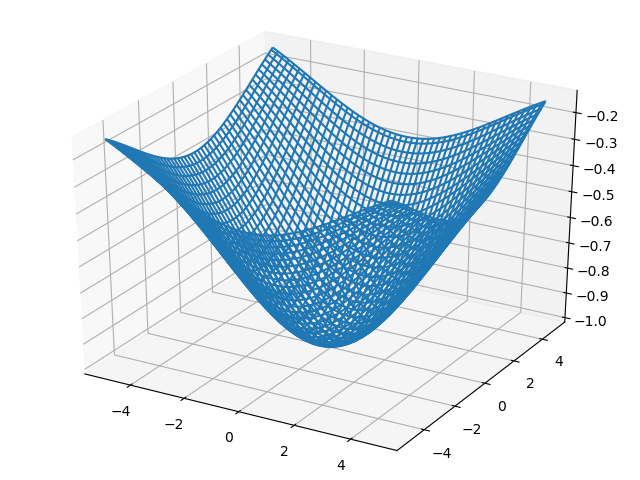

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x0, x1):
    return ( -1 * np.exp(-1 * (x0**2 + x1 ** 2) / 25))

x0 = np.arange(-5, 5, 0.1)
x1 = np.arange(-5, 5, 0.1)
X0, X1 = np.meshgrid(x0, x1)
Y = func(X0, X1)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X0,X1,Y)
plt.show()

matplotlibは `%matplotlib notebook` と記述することでインタラクティブにグラフを見ることができる. これを使って所望の形をしているのかを簡単に確認できる. 

これを解いてみる. 勾配ベクトルとヘッセ行列は手で計算すればすぐに求まるので, 後はそれを書いてやるだけで良い. 

Start: [-1.05983019 -3.73726224]
NewtonMethod
OK:  4
[ -4.51095866e-17  -1.59062623e-16]
time: 0.001346999999999099


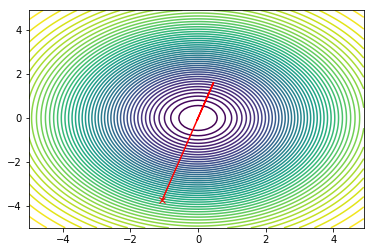

In [9]:
## ニュートン法
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

delta = 0.1
minXY=-5.0
maxXY=5.0
nContour=50
alpha=1

def Hessian(state):
    u"""
    Hessian matrix of Himmelblau's function
    """
    x=state[0]
    y=state[1]
    dxx=((2/25) - x**2 / (25**2))*np.exp(-1 * (x**2 + y**2)/25)
    dxy=(-1 * x * y / (25**2))*np.exp(-1 * (x**2 + y**2)/25)
    dyy=((2/25) - y**2 / (25**2))*np.exp(-1 * (x**2 + y**2)/25)
    H=np.array([[dxx,dxy],[dxy,dyy]])
    return H
    

def Jacob(state):
    u"""
    jacobi matrix of Himmelblau's function
    """
    x=state[0]
    y=state[1]
    dx= x * (2/25) * np.exp(-1 * (x**2 + y**2)/25)
    dy= y* (2/25) * np.exp(-1 * (x**2 + y**2)/25)
    J=[dx,dy]
    return J

def Gaussian(x,y):
    
    return -1 * np.exp(-1 * (x**2 + y**2)/16)

def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[Gaussian(x,y) for (x,y) in zip(X,Y)]
    return(X,Y,Z)

@dcrtF
def NewtonMethod(start,Jacob):
    u"""
    Newton Method Optimization
    """
    counter = 0
    print ("NewtonMethod")
    result=start
    x=start

    while 1:
        J=Jacob(x)
        H=Hessian(x)
        sumJ=sum([abs(alpha*j) for j in J])
        if sumJ<=0.000001:
            print("OK: ", counter)
            break

        grad=-np.linalg.inv(H).dot(J) 
        #print(grad)

        x=x+[alpha*j for j in grad]
        
        result=np.vstack((result,x))
        counter += 1
    print(x)
    return result

# Main
start=np.array([random.uniform(minXY,maxXY),random.uniform(minXY,maxXY)])
print("Start:" ,start)
result=NewtonMethod(start,Jacob)
(X,Y,Z)=CreateMeshData()
CS = plt.contour(X, Y, Z,nContour)
#  plt.clabel(CS, inline=1, fontsize=10)
#  plt.title('Simplest default with labels')

plt.plot(start[0],start[1],"xr");

optX=[x[0] for x in result]
optY=[x[1] for x in result]
plt.plot(optX,optY,"-r");

plt.show()

## コメント
上のニュートン法の例は, ステップサイズ($\alpha$)の値が1.0だとうまく最適解を見つけられないことがあるので, ちょうどいいステップサイズを決めるために直線探索を行う必要がある. 2分割法とかを実装して, アルミホの基準を満たすような $\alpha$ を求めることができたらもっとうまく動くんじゃないか. 逆に, (当然ながら)ステップサイズが小さいと試行回数が増えるので時間がかかる. 

勾配ベクトルとヘッセ行列は手で計算しているので, やることとしてはアルゴリズムを愚直に(一般的なものとしては実装できないが)書いてやれば良い. また, sagemath(pythonの数学ソフトウェア. MATHEMATICAみたいな感じ?)だと勾配とヘッセ行列を計算する関数がすでに実装されている. 

また, 初期点の選び方も注意する必要があり, ガウス関数の広がり具合に応じて初期点の範囲を指定してやる必要がある($-e^{-\frac{x^2 + y^2}{\sigma^2}}$ とすると, $[-\sigma, \sigma]$ の範囲で初期点を選んでやる必要がある. 